# Clustering Crypto

In [1]:
# Initial imports
import requests
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [2]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"
response = requests.get(url).json()

In [3]:
# Create a DataFrame
crypto_df = pd.DataFrame(response['Data']).T
crypto_df.head()

Algorithm BlockNumber BlockReward BlockTime BuiltOn   CoinName  \
42     Scrypt      194128           0         0     N/A    42 Coin   
300       N/A           0           0         0    7605  300 token   
365       X11         NaN         NaN       NaN     N/A    365Coin   
404    Scrypt       39655     29.3415        60     N/A    404Coin   
433       N/A    10736790           2         0    7605  433 Token   

    ContentCreatedOn DecimalPlaces         FullName FullyPremined  ...  \
42        1427211129             0     42 Coin (42)             0  ...   
300       1517935016            18  300 token (300)             0  ...   
365       1480032918             0    365Coin (365)             0  ...   
404       1466100361             0    404Coin (404)             0  ...   
433       1541597321            18  433 Token (433)             0  ...   

                                                Rating  \
42   {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   
300  {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   
365  {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   
404  {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   
433  {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   

                           SmartContractAddress SortOrder Sponsored Symbol  \
42                                          N/A        34     False     42   
300  0xaec98a708810414878c3bcdf46aad31ded4a4557      2212     False    300   
365                                         N/A       916     False    365   
404                                         N/A       602     False    404   
433  0x738505a5f31bf72e0b70298bca81150eb1b7c751      3505     False    433   

                                              Taxonomy TotalCoinSupply  \
42   {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...              42   
300  {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...             300   
365  {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...      2300000000   
404  {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...       532000000   
433  {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...      1000000000   

    TotalCoinsFreeFloat TotalCoinsMined                  Url  
42                  N/A              42   /coins/42/overview  
300                 N/A             300  /coins/300/overview  
365                 N/A             NaN  /coins/365/overview  
404                 N/A     1.06121e+06  /coins/404/overview  
433                 N/A     1.12341e+08  /coins/433/overview  

[5 rows x 27 columns]

In [4]:
# Alternatively, use the provided csv file:
# file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame
# crypto_df = pd.read_csv(file_path, index_col=0)
# crypto_df.head(10)

### Data Preprocessing

In [5]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df=crypto_df[['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply']]
crypto_df.head(10)

CoinName Algorithm IsTrading ProofType TotalCoinsMined TotalCoinSupply
42      42 Coin    Scrypt      True   PoW/PoS              42              42
300   300 token       N/A      True       N/A             300             300
365     365Coin       X11      True   PoW/PoS             NaN      2300000000
404     404Coin    Scrypt      True   PoW/PoS     1.06121e+06       532000000
433   433 Token       N/A     False       N/A     1.12341e+08      1000000000
611   SixEleven   SHA-256      True       PoW             NaN          611000
808         808   SHA-256      True   PoW/PoS               0               0
888    Octocoin       N/A      True       PoW        50786536       135776563
1337  EliteCoin       X13      True   PoW/PoS     2.94783e+10    314159265359
2015  2015 coin       X11      True   PoW/PoS             NaN               0

In [6]:
# Keep only cryptocurrencies that are trading
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
print(crypto_df.shape)
crypto_df.head(10)

(4128, 6)


CoinName Algorithm IsTrading ProofType TotalCoinsMined  \
42        42 Coin    Scrypt      True   PoW/PoS              42   
300     300 token       N/A      True       N/A             300   
365       365Coin       X11      True   PoW/PoS             NaN   
404       404Coin    Scrypt      True   PoW/PoS     1.06121e+06   
611     SixEleven   SHA-256      True       PoW             NaN   
808           808   SHA-256      True   PoW/PoS               0   
888      Octocoin       N/A      True       PoW        50786536   
1337    EliteCoin       X13      True   PoW/PoS     2.94783e+10   
2015    2015 coin       X11      True   PoW/PoS             NaN   
BTCD  BitcoinDark   SHA-256      True   PoW/PoS         1288862   

     TotalCoinSupply  
42                42  
300              300  
365       2300000000  
404        532000000  
611           611000  
808                0  
888        135776563  
1337    314159265359  
2015               0  
BTCD        22000000

In [7]:
# Keep only cryptocurrencies with a working algorithm
crypto_df = crypto_df[crypto_df["Algorithm"] != "N/A"]
print(crypto_df.shape)
crypto_df.head(10)

(1458, 6)


CoinName Algorithm IsTrading ProofType TotalCoinsMined  \
42         42 Coin    Scrypt      True   PoW/PoS              42   
365        365Coin       X11      True   PoW/PoS             NaN   
404        404Coin    Scrypt      True   PoW/PoS     1.06121e+06   
611      SixEleven   SHA-256      True       PoW             NaN   
808            808   SHA-256      True   PoW/PoS               0   
1337     EliteCoin       X13      True   PoW/PoS     2.94783e+10   
2015     2015 coin       X11      True   PoW/PoS             NaN   
BTCD   BitcoinDark   SHA-256      True   PoW/PoS         1288862   
CRAIG   CraigsCoin       X11      True       PoS             NaN   
XBS       Bitstake       X11      True   PoW/PoS               0   

      TotalCoinSupply  
42                 42  
365        2300000000  
404         532000000  
611            611000  
808                 0  
1337     314159265359  
2015                0  
BTCD         22000000  
CRAIG        30000000  
XBS           1300000

In [8]:
# Remove the "IsTrading" column
crypto_df.drop("IsTrading", axis=1, inplace=True)
print(crypto_df.shape)
crypto_df.head(10)

(1458, 5)


CoinName Algorithm ProofType TotalCoinsMined TotalCoinSupply
42         42 Coin    Scrypt   PoW/PoS              42              42
365        365Coin       X11   PoW/PoS             NaN      2300000000
404        404Coin    Scrypt   PoW/PoS     1.06121e+06       532000000
611      SixEleven   SHA-256       PoW             NaN          611000
808            808   SHA-256   PoW/PoS               0               0
1337     EliteCoin       X13   PoW/PoS     2.94783e+10    314159265359
2015     2015 coin       X11   PoW/PoS             NaN               0
BTCD   BitcoinDark   SHA-256   PoW/PoS         1288862        22000000
CRAIG   CraigsCoin       X11       PoS             NaN        30000000
XBS       Bitstake       X11   PoW/PoS               0         1300000

In [9]:
# Remove rows with at least 1 null value
crypto_df = crypto_df.dropna(axis=0, how="any")
print(crypto_df.shape)
crypto_df.head(10)

(871, 5)


CoinName Algorithm ProofType TotalCoinsMined TotalCoinSupply
42        42 Coin    Scrypt   PoW/PoS              42              42
404       404Coin    Scrypt   PoW/PoS     1.06121e+06       532000000
808           808   SHA-256   PoW/PoS               0               0
1337    EliteCoin       X13   PoW/PoS     2.94783e+10    314159265359
BTCD  BitcoinDark   SHA-256   PoW/PoS         1288862        22000000
XBS      Bitstake       X11   PoW/PoS               0         1300000
XPY       PayCoin   SHA-256       PoS     1.19953e+07        12500000
PRC   ProsperCoin    Scrypt       PoW         6266830        21000000
KOBO     KoboCoin       X15   PoW/PoS     2.55844e+07       350000000
XPD   PetroDollar  SHA-256D       N/A        63993275       122107462

In [10]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
print(crypto_df.shape)
crypto_df.head(10)

(667, 5)


CoinName Algorithm ProofType TotalCoinsMined TotalCoinSupply
42        42 Coin    Scrypt   PoW/PoS              42              42
404       404Coin    Scrypt   PoW/PoS     1.06121e+06       532000000
1337    EliteCoin       X13   PoW/PoS     2.94783e+10    314159265359
BTCD  BitcoinDark   SHA-256   PoW/PoS         1288862        22000000
XPY       PayCoin   SHA-256       PoS     1.19953e+07        12500000
PRC   ProsperCoin    Scrypt       PoW         6266830        21000000
KOBO     KoboCoin       X15   PoW/PoS     2.55844e+07       350000000
XPD   PetroDollar  SHA-256D       N/A        63993275       122107462
ARG      Argentum    Scrypt       PoW     1.38237e+07        64000000
BLU      BlueCoin    Scrypt   PoW/PoS       647272520               0

In [11]:
# Drop rows where there are 'N/A' text values
crypto_df = crypto_df[crypto_df.iloc[:] != 'N/A'].dropna()
crypto_df.head(10)

CoinName Algorithm ProofType TotalCoinsMined TotalCoinSupply
42        42 Coin    Scrypt   PoW/PoS              42              42
404       404Coin    Scrypt   PoW/PoS     1.06121e+06       532000000
1337    EliteCoin       X13   PoW/PoS     2.94783e+10    314159265359
BTCD  BitcoinDark   SHA-256   PoW/PoS         1288862        22000000
XPY       PayCoin   SHA-256       PoS     1.19953e+07        12500000
PRC   ProsperCoin    Scrypt       PoW         6266830        21000000
KOBO     KoboCoin       X15   PoW/PoS     2.55844e+07       350000000
ARG      Argentum    Scrypt       PoW     1.38237e+07        64000000
BLU      BlueCoin    Scrypt   PoW/PoS       647272520               0
XMY    MyriadCoin  Multiple       PoW      1746600250      2000000000

In [12]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coins_name = pd.DataFrame(crypto_df["CoinName"], index=crypto_df.index)
print(coins_name.shape)
coins_name.head()

(539, 1)


CoinName
42        42 Coin
404       404Coin
1337    EliteCoin
BTCD  BitcoinDark
XPY       PayCoin

In [13]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df = crypto_df.drop("CoinName", axis=1)
print(crypto_df.shape)
crypto_df.head(10)

(539, 4)


Algorithm ProofType TotalCoinsMined TotalCoinSupply
42      Scrypt   PoW/PoS              42              42
404     Scrypt   PoW/PoS     1.06121e+06       532000000
1337       X13   PoW/PoS     2.94783e+10    314159265359
BTCD   SHA-256   PoW/PoS         1288862        22000000
XPY    SHA-256       PoS     1.19953e+07        12500000
PRC     Scrypt       PoW         6266830        21000000
KOBO       X15   PoW/PoS     2.55844e+07       350000000
ARG     Scrypt       PoW     1.38237e+07        64000000
BLU     Scrypt   PoW/PoS       647272520               0
XMY   Multiple       PoW      1746600250      2000000000

In [14]:
# Create dummy variables for text features
X = pd.get_dummies(data=crypto_df, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head(10)

(539, 107)


TotalCoinsMined TotalCoinSupply  Algorithm_1GB AES Pattern Search  \
42                42              42                                 0   
404      1.06121e+06       532000000                                 0   
1337     2.94783e+10    314159265359                                 0   
BTCD         1288862        22000000                                 0   
XPY      1.19953e+07        12500000                                 0   
PRC          6266830        21000000                                 0   
KOBO     2.55844e+07       350000000                                 0   
ARG      1.38237e+07        64000000                                 0   
BLU        647272520               0                                 0   
XMY       1746600250      2000000000                                 0   

      Algorithm_536  Algorithm_Argon2d  Algorithm_BLAKE256  \
42                0                  0                   0   
404               0                  0                   0   
1337              0                  0                   0   
BTCD              0                  0                   0   
XPY               0                  0                   0   
PRC               0                  0                   0   
KOBO              0                  0                   0   
ARG               0                  0                   0   
BLU               0                  0                   0   
XMY               0                  0                   0   

      Algorithm_BMW512 / Echo512  Algorithm_Blake  Algorithm_Blake2S  \
42                             0                0                  0   
404                            0                0                  0   
1337                           0                0                  0   
BTCD                           0                0                  0   
XPY                            0                0                  0   
PRC                            0                0                  0   
KOBO                           0                0                  0   
ARG                            0                0                  0   
BLU                            0                0                  0   
XMY                            0                0                  0   

      Algorithm_Blake2b  ...  ProofType_PoW/PoS  ProofType_PoW/PoS   \
42                    0  ...                  1                   0   
404                   0  ...                  1                   0   
1337                  0  ...                  1                   0   
BTCD                  0  ...                  1                   0   
XPY                   0  ...                  0                   0   
PRC                   0  ...                  0                   0   
KOBO                  0  ...                  1                   0   
ARG                   0  ...                  0                   0   
BLU                   0  ...                  1                   0   
XMY                   0  ...                  0                   0   

      ProofType_PoW/PoW  ProofType_PoW/nPoS  ProofType_Pos  \
42                    0                   0              0   
404                   0                   0              0   
1337                  0                   0              0   
BTCD                  0                   0              0   
XPY                   0                   0              0   
PRC                   0                   0              0   
KOBO                  0                   0              0   
ARG                   0                   0              0   
BLU                   0                   0              0   
XMY                   0                   0              0   

      ProofType_Proof of Authority  ProofType_Proof of Trust  ProofType_TPoS  \
42                               0                         0               0   
404                              0                         0               0   
1337     

In [15]:
# Standardize data
X = StandardScaler().fit_transform(X)
X[:5]

array([[-0.11912833, -0.15647405, -0.04311306, -0.04311306, -0.04311306,
        -0.06102782, -0.04311306, -0.0748132 , -0.04311306, -0.06102782,
        -0.06102782, -0.04311306, -0.04311306, -0.04311306, -0.18046343,
        -0.04311306, -0.04311306, -0.08646754, -0.04311306, -0.04311306,
        -0.13031167, -0.0748132 , -0.04311306, -0.04311306, -0.04311306,
        -0.04311306, -0.15720951, -0.04311306, -0.04311306, -0.13031167,
        -0.04311306, -0.04311306, -0.08646754, -0.04311306, -0.04311306,
        -0.04311306, -0.04311306, -0.04311306, -0.04311306, -0.04311306,
        -0.0748132 , -0.09676412, -0.06102782, -0.04311306, -0.13749033,
        -0.13031167, -0.13031167, -0.04311306, -0.04311306, -0.04311306,
        -0.0748132 , -0.18587346, -0.04311306, -0.04311306, -0.04311306,
        -0.0748132 , -0.19115036, -0.04311306, -0.31622777, -0.04311306,
        -0.08646754, -0.0748132 , -0.06102782,  1.4301041 , -0.04311306,
        -0.04311306, -0.06102782, -0.04311306, -0.0

### Reducing Dimensions Using PCA

In [16]:
# Use PCA to reduce dimension to 3 principal components
n_comp = 3
pca = PCA(n_components=n_comp)
principal_components = pca.fit_transform(X)
principal_components

array([[-0.36337693,  0.96698249, -0.59610342],
       [-0.35949365,  0.9669689 , -0.59614795],
       [ 2.34945816,  1.8831634 , -0.56222525],
       ...,
       [-0.46379116,  1.2733481 , 10.93203857],
       [ 0.66110043,  1.62230179, -0.15563769],
       [ 2.99060454,  0.98497617, -0.23406154]])

In [17]:
# Create a DataFrame with the principal components data
col_names = [f"PC {i}" for i in range(1, n_comp + 1)]
pcs_df = pd.DataFrame(principal_components, columns=col_names, index=crypto_df.index)
print(pcs_df.shape)
pcs_df.head(10)

(539, 3)


PC 1      PC 2      PC 3
42   -0.363377  0.966982 -0.596103
404  -0.359494  0.966969 -0.596148
1337  2.349458  1.883163 -0.562225
BTCD -0.340407  0.898947 -0.333862
XPY  -0.293245  0.577575 -0.050275
PRC  -0.168143 -1.207272 -0.044992
KOBO -0.263691  1.906397 -0.592845
ARG  -0.167737 -1.207266 -0.045000
BLU  -0.355392  0.967603 -0.596500
XMY  -0.083397 -1.717654  0.385531

### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [18]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [19]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = pd.concat([crypto_df, pcs_df], axis=1, sort=False)
clustered_df["CoinName"] = coins_name["CoinName"]
clustered_df["Class"] = model.labels_
print(clustered_df.shape)
clustered_df.head(10)

(539, 9)


Algorithm ProofType TotalCoinsMined TotalCoinSupply      PC 1      PC 2  \
42      Scrypt   PoW/PoS              42              42 -0.363377  0.966982   
404     Scrypt   PoW/PoS     1.06121e+06       532000000 -0.359494  0.966969   
1337       X13   PoW/PoS     2.94783e+10    314159265359  2.349458  1.883163   
BTCD   SHA-256   PoW/PoS         1288862        22000000 -0.340407  0.898947   
XPY    SHA-256       PoS     1.19953e+07        12500000 -0.293245  0.577575   
PRC     Scrypt       PoW         6266830        21000000 -0.168143 -1.207272   
KOBO       X15   PoW/PoS     2.55844e+07       350000000 -0.263691  1.906397   
ARG     Scrypt       PoW     1.38237e+07        64000000 -0.167737 -1.207266   
BLU     Scrypt   PoW/PoS       647272520               0 -0.355392  0.967603   
XMY   Multiple       PoW      1746600250      2000000000 -0.083397 -1.717654   

          PC 3     CoinName  Class  
42   -0.596103      42 Coin      1  
404  -0.596148      404Coin      1  
1337 -0.562225    EliteCoin      1  
BTCD -0.333862  BitcoinDark      1  
XPY  -0.050275      PayCoin      1  
PRC  -0.044992  ProsperCoin      0  
KOBO -0.592845     KoboCoin      1  
ARG  -0.045000     Argentum      0  
BLU  -0.596500     BlueCoin      1  
XMY   0.385531   MyriadCoin      0

### Visualizing Results

#### 3D-Scatter with Clusters

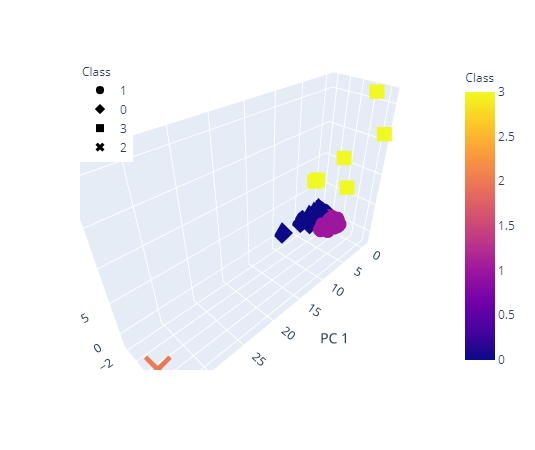

In [20]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [21]:
# Table with tradable cryptos
clustered_df[
    [
        "CoinName",
        "Algorithm",
        "ProofType",
        "TotalCoinSupply",
        "TotalCoinsMined",
        "Class",
    ]
].hvplot.table()

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [22]:
# Print the total number of tradable cryptocurrencies
print(f"There are {clustered_df.shape[0]} tradable cryptocurrencies.")

There are 539 tradable cryptocurrencies.


#### Scatter Plot with Tradable Cryptocurrencies

In [23]:
# Scale data to create the scatter plot
mm_scaler = MinMaxScaler()
plot_data = mm_scaler.fit_transform(
    clustered_df[["TotalCoinSupply", "TotalCoinsMined"]]
)
plot_df = pd.DataFrame(
    plot_data, columns=["TotalCoinSupply", "TotalCoinsMined"], index=clustered_df.index
)
plot_df["CoinName"] = clustered_df["CoinName"]
plot_df["Class"] = clustered_df["Class"]
plot_df.head()

TotalCoinSupply  TotalCoinsMined     CoinName  Class
42       4.200000e-11         0.000000      42 Coin      1
404      5.320000e-04         0.000001      404Coin      1
1337     3.141593e-01         0.029776    EliteCoin      1
BTCD     2.200000e-05         0.000001  BitcoinDark      1
XPY      1.250000e-05         0.000012      PayCoin      1

In [24]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
plot_df.hvplot.scatter(
    x="TotalCoinsMined", y="TotalCoinSupply", hover_cols=["CoinName"], by="Class"
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)